In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data=pd.read_csv("mental_health_dataset.csv")
data.head(5)

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [4]:
data.isnull().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
cat_data=data.select_dtypes(include="object")
num_data=data.select_dtypes(include="number")

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


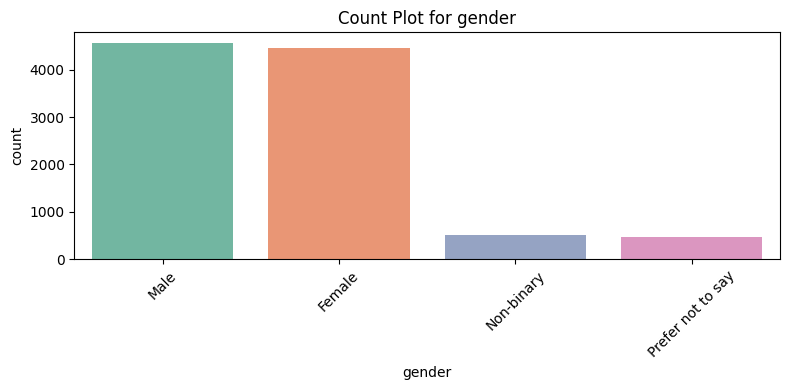

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


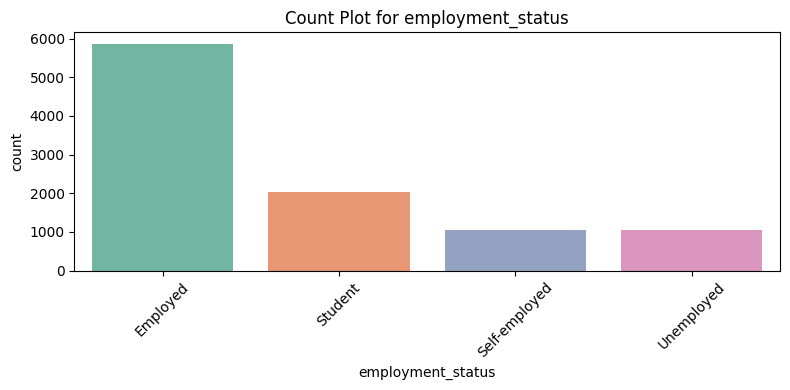

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


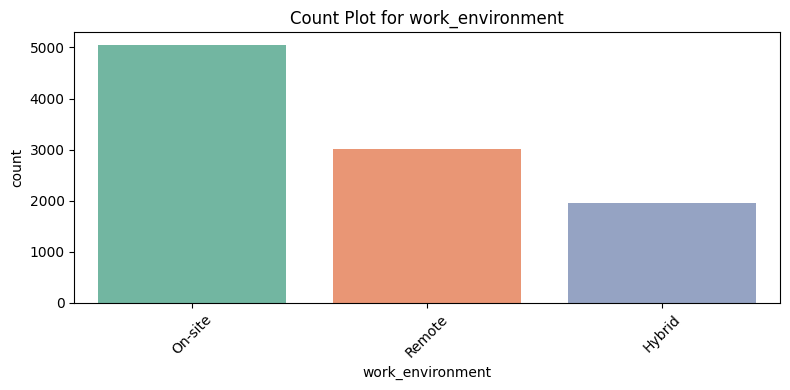

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


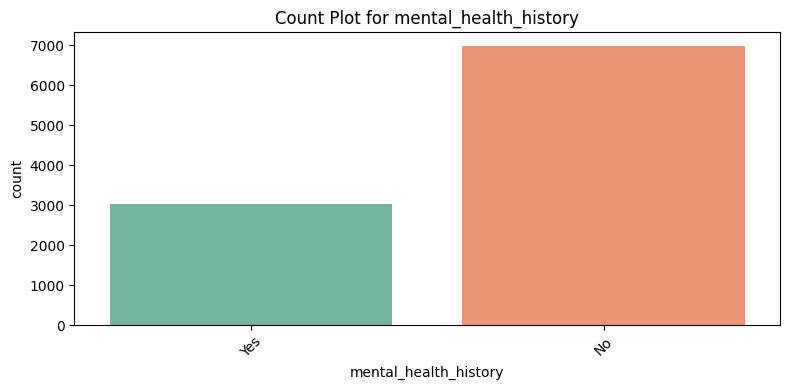

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


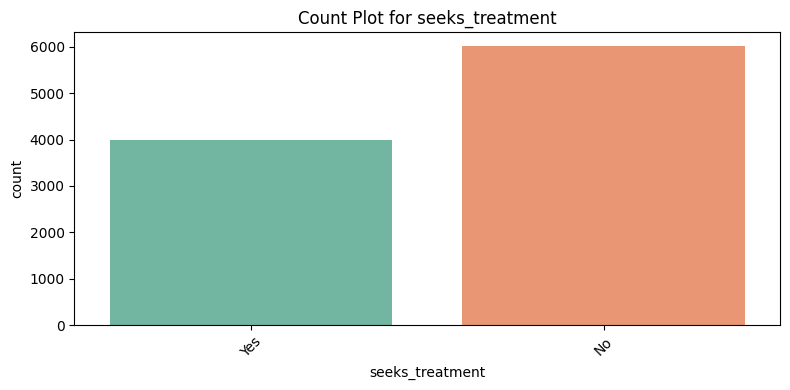

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_39996/1728736324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col],palette="Set2")


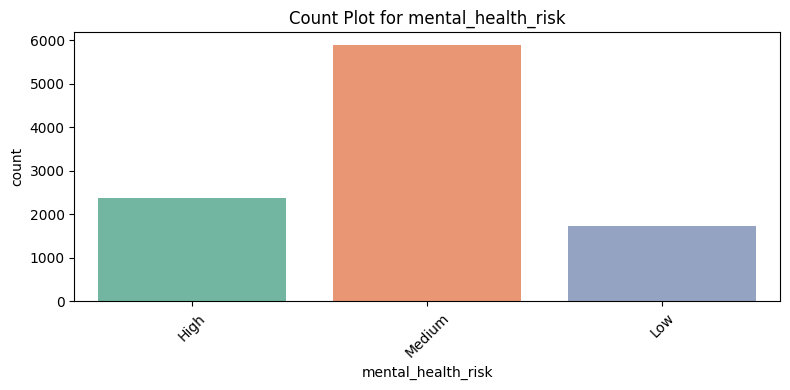

In [7]:
for col in cat_data.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col],palette="Set2")
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


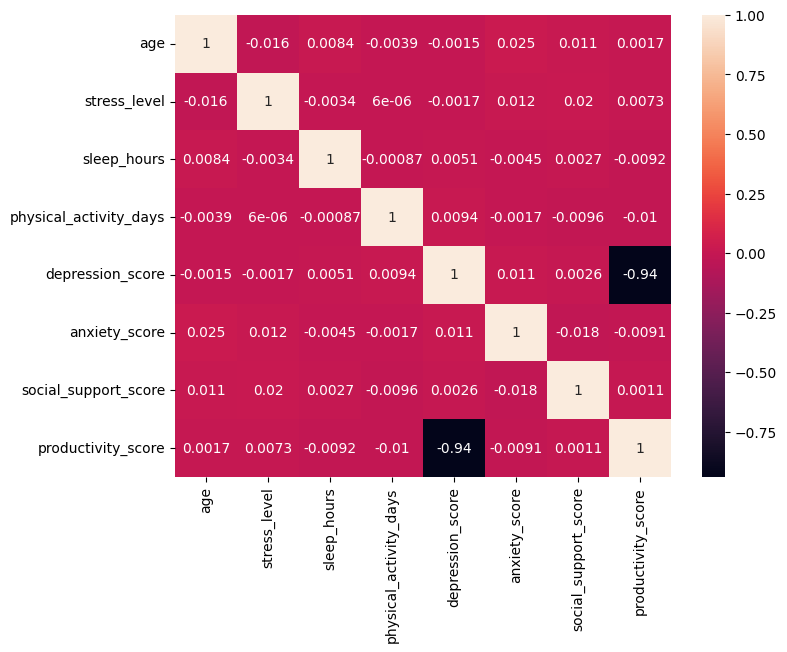

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(num_data.corr(),annot=True)
plt.show()

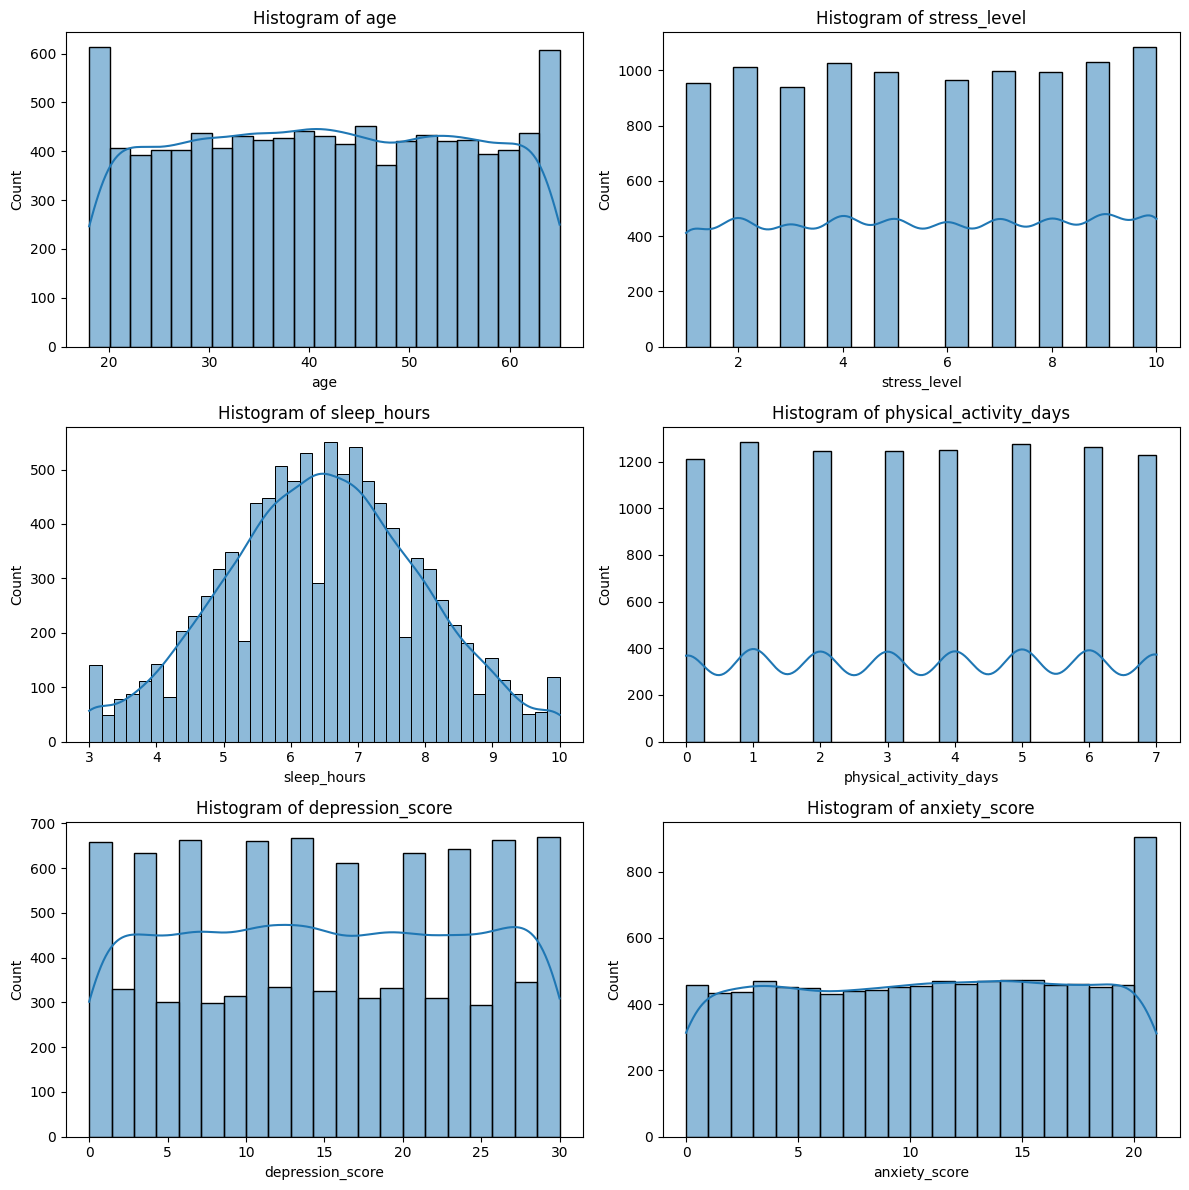

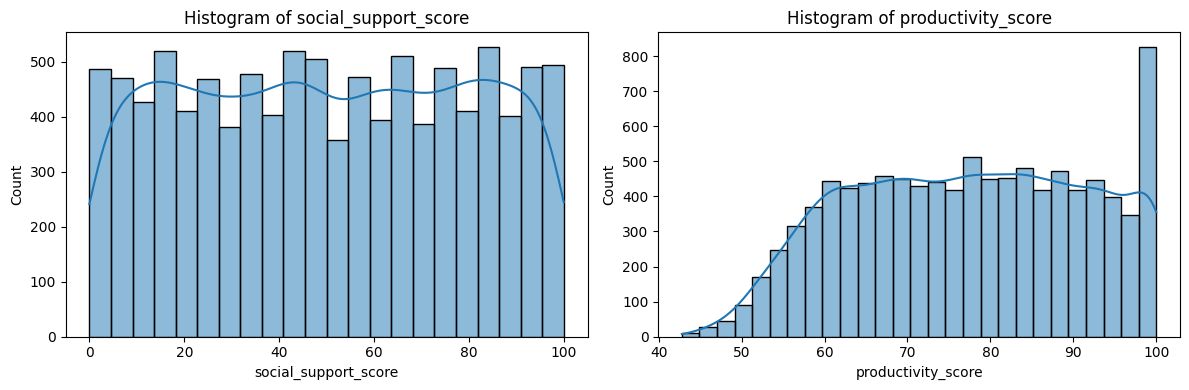

In [9]:
num_cols = num_data.columns.tolist()
plots_per_fig = 6  

for i in range(0, len(num_cols), plots_per_fig):
    cols_subset = num_cols[i:i+plots_per_fig]
    n = len(cols_subset)
    
    n_rows = (n + 1) // 2 

    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for j, col in enumerate(cols_subset):
        sns.histplot(data=num_data, x=col, kde=True, ax=axes[j])
        axes[j].set_title(f'Histogram of {col}')

    for k in range(j + 1, len(axes)):
        axes[k].set_visible(False)

    plt.tight_layout()
    plt.show()


In [10]:
for col in data.columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [11]:
x=data.drop(["mental_health_risk"],axis=1)
y=data["mental_health_risk"]

In [12]:
for col in cat_data.columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [14]:
classifier={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier()
}

In [15]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))

Logistic Regression
99.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00       359
           2       1.00      1.00      1.00      1166

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Random Forest Classifier
97.85000000000001
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       475
           1       0.98      0.95      0.96       359
           2       0.97      0.99      0.98      1166

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Decision Tree Classifier
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier
68.25
              precision    recall  f1-score   support

           0       1.00      0.42      0.59       475
           1       0.00      0.00      0.00       359
           2       0.65      1.00      0.79      1166

    accuracy                           0.68      2000
   macro avg       0.55      0.47      0.46      2000
weighted avg       0.61      0.68      0.60      2000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

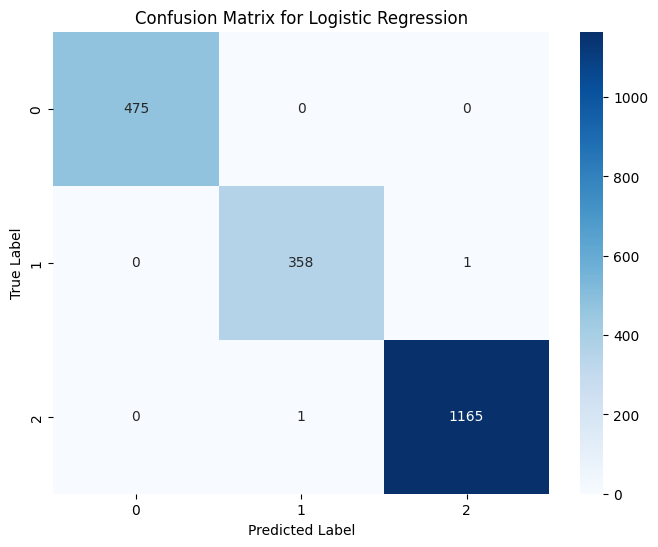

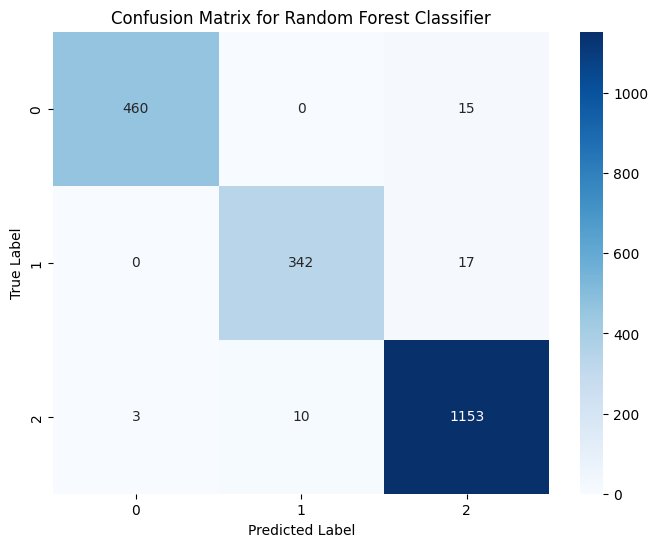

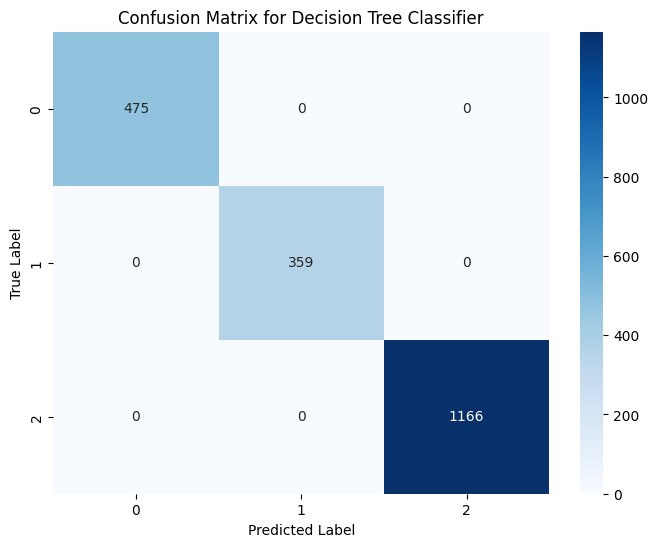

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


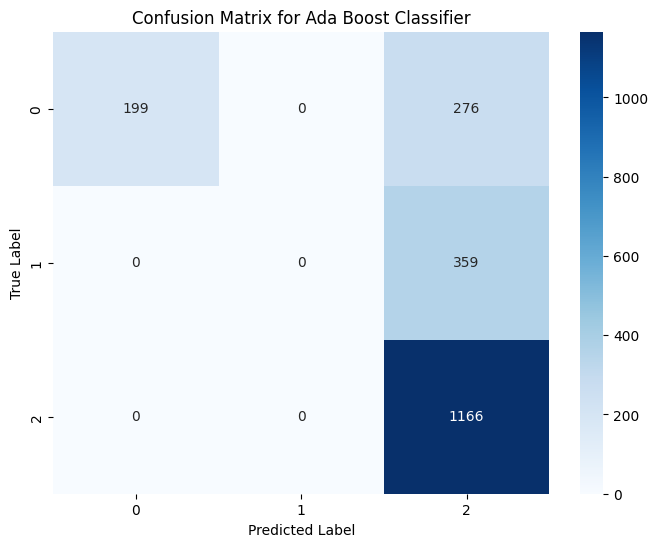

In [17]:
import numpy as np
accuracy_results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [ ]:
result={
    "Model":["Logistic Regression","Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier"],
    "Accuracy":[99.9,97.8,100,100]
}